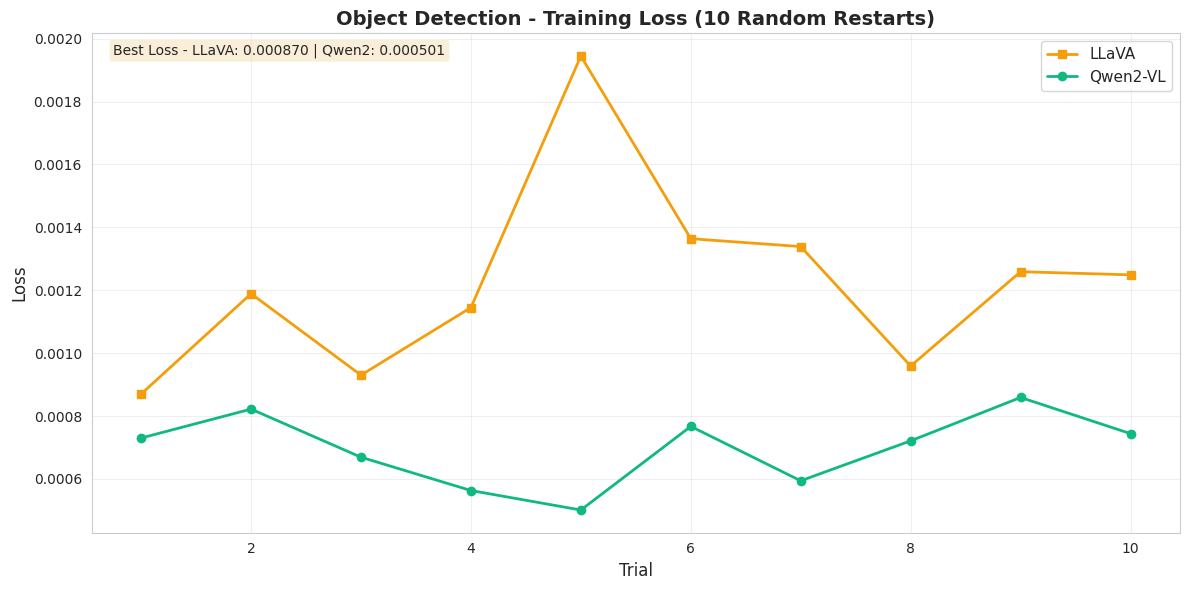

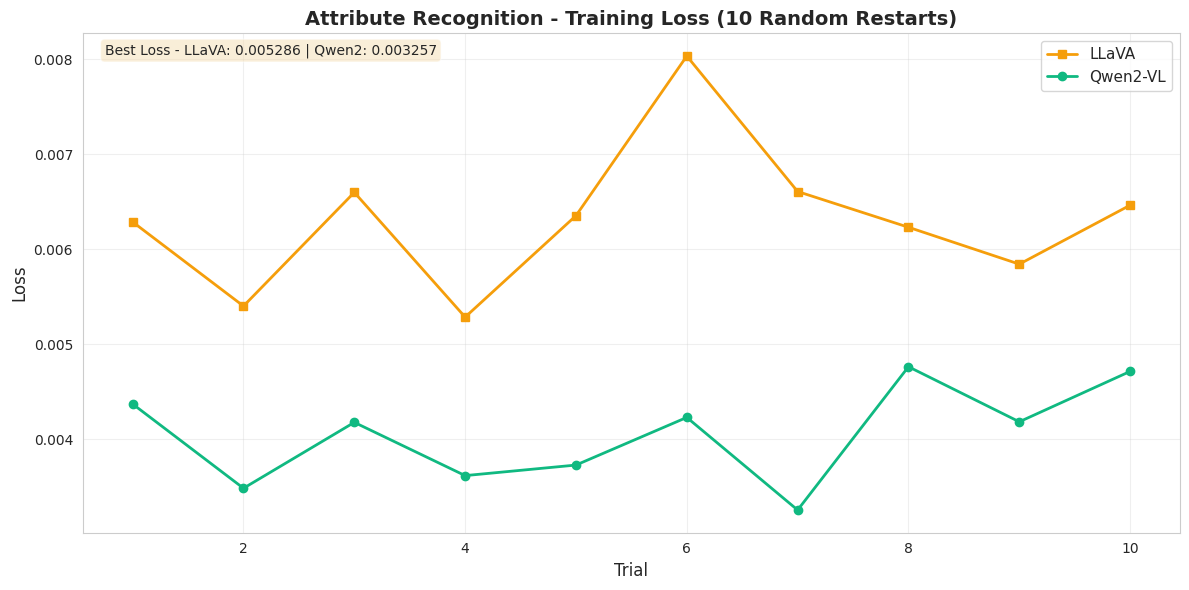

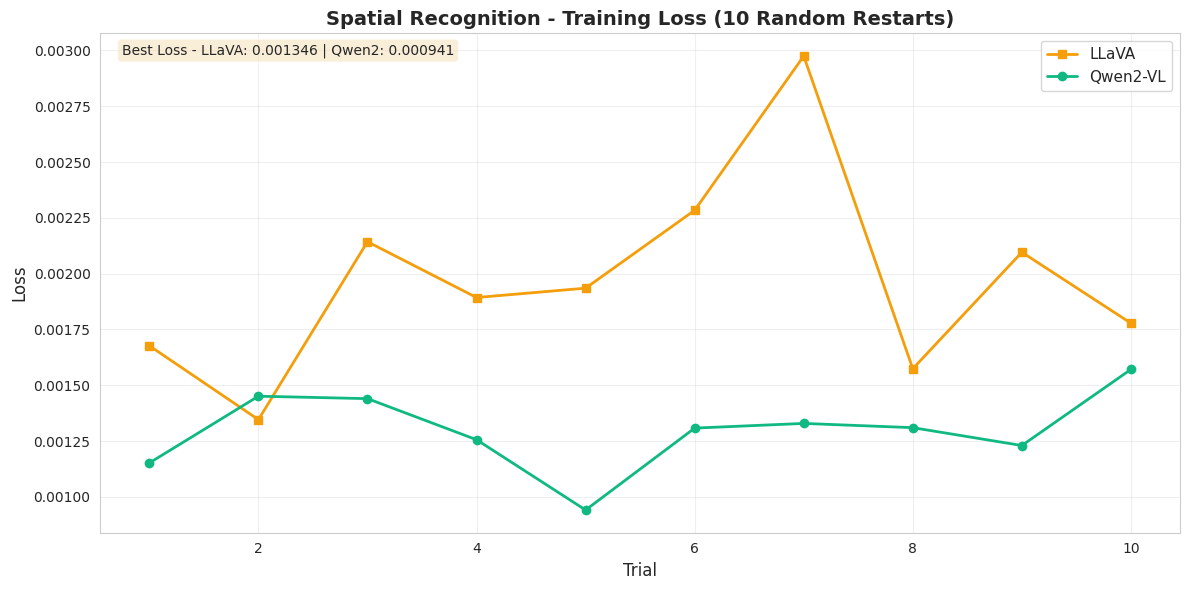

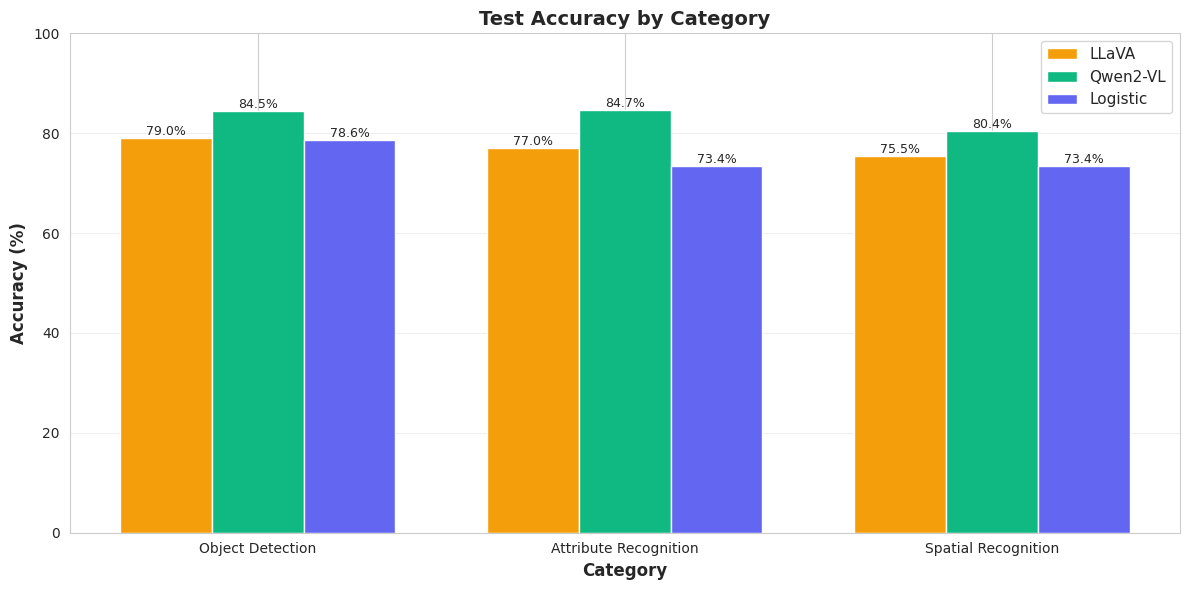

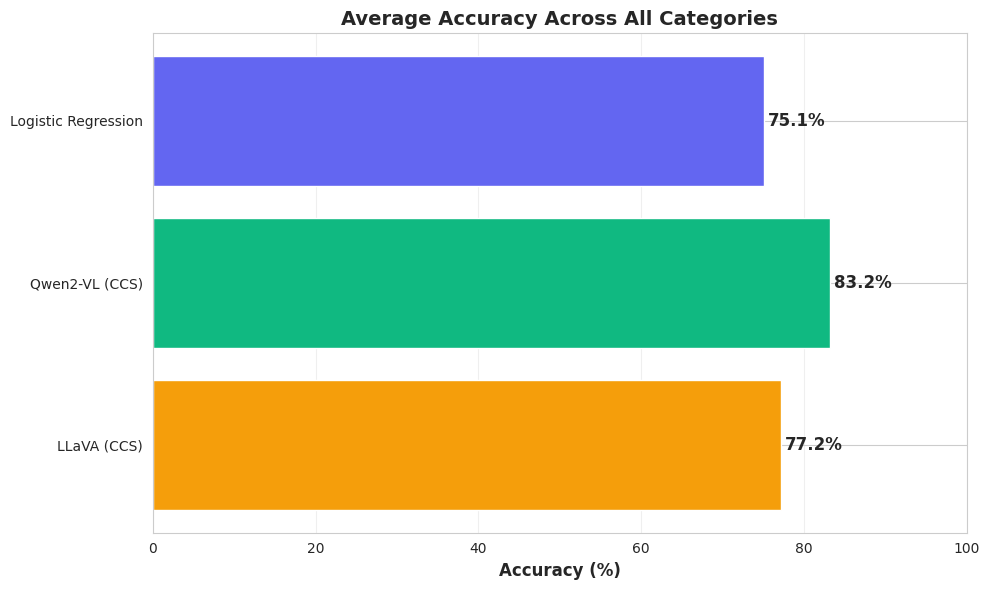

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# Training loss data for CCS models (10 trials each)
object_detection_loss = {
    'llava': [0.000870, 0.001189, 0.000930, 0.001145, 0.001945, 0.001364, 0.001339, 0.000959, 0.001259, 0.001249],
    'qwen2': [0.000730, 0.000822, 0.000669, 0.000563, 0.000501, 0.000767, 0.000594, 0.000721, 0.000859, 0.000744]
}

attribute_recognition_loss = {
    'llava': [0.006287, 0.005402, 0.006598, 0.005286, 0.006353, 0.008032, 0.006607, 0.006231, 0.005843, 0.006463],
    'qwen2': [0.004372, 0.003486, 0.004179, 0.003619, 0.003730, 0.004231, 0.003257, 0.004764, 0.004185, 0.004715]
}

spatial_recognition_loss = {
    'llava': [0.001677, 0.001346, 0.002143, 0.001893, 0.001935, 0.002284, 0.002975, 0.001574, 0.002096, 0.001778],
    'qwen2': [0.001152, 0.001451, 0.001440, 0.001256, 0.000941, 0.001308, 0.001329, 0.001310, 0.001230, 0.001571]
}

# Accuracy data - reordered: LLaVA, Qwen2, Logistic
accuracy_data = {
    'Object Detection': {'LLaVA': 79.0, 'Qwen2-VL': 84.5, 'Logistic': 78.6},
    'Attribute Recognition': {'LLaVA': 77.0, 'Qwen2-VL': 84.7, 'Logistic': 73.4},
    'Spatial Recognition': {'LLaVA': 75.5, 'Qwen2-VL': 80.4, 'Logistic': 73.4}
}

average_accuracy = {
    'LLaVA (CCS)': 77.2,
    'Qwen2-VL (CCS)': 83.2,
    'Logistic Regression': 75.1
}

trials = list(range(1, 11))

# ============================================================================
# CHART 1: Object Detection Loss
# ============================================================================
fig1, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(trials, object_detection_loss['llava'], marker='s', linewidth=2, 
         label='LLaVA', color='#f59e0b', markersize=6)
ax1.plot(trials, object_detection_loss['qwen2'], marker='o', linewidth=2, 
         label='Qwen2-VL', color='#10b981', markersize=6)

ax1.set_title('Object Detection - Training Loss (10 Random Restarts)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Trial', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.text(0.02, 0.98, f"Best Loss - LLaVA: {min(object_detection_loss['llava']):.6f} | Qwen2: {min(object_detection_loss['qwen2']):.6f}", 
         transform=ax1.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# CHART 2: Attribute Recognition Loss
# ============================================================================
fig2, ax2 = plt.subplots(figsize=(12, 6))

ax2.plot(trials, attribute_recognition_loss['llava'], marker='s', linewidth=2, 
         label='LLaVA', color='#f59e0b', markersize=6)
ax2.plot(trials, attribute_recognition_loss['qwen2'], marker='o', linewidth=2, 
         label='Qwen2-VL', color='#10b981', markersize=6)

ax2.set_title('Attribute Recognition - Training Loss (10 Random Restarts)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Trial', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.text(0.02, 0.98, f"Best Loss - LLaVA: {min(attribute_recognition_loss['llava']):.6f} | Qwen2: {min(attribute_recognition_loss['qwen2']):.6f}", 
         transform=ax2.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# CHART 3: Spatial Recognition Loss
# ============================================================================
fig3, ax3 = plt.subplots(figsize=(12, 6))

ax3.plot(trials, spatial_recognition_loss['llava'], marker='s', linewidth=2, 
         label='LLaVA', color='#f59e0b', markersize=6)
ax3.plot(trials, spatial_recognition_loss['qwen2'], marker='o', linewidth=2, 
         label='Qwen2-VL', color='#10b981', markersize=6)

ax3.set_title('Spatial Recognition - Training Loss (10 Random Restarts)', fontsize=14, fontweight='bold')
ax3.set_xlabel('Trial', fontsize=12)
ax3.set_ylabel('Loss', fontsize=12)
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3)
ax3.text(0.02, 0.98, f"Best Loss - LLaVA: {min(spatial_recognition_loss['llava']):.6f} | Qwen2: {min(spatial_recognition_loss['qwen2']):.6f}", 
         transform=ax3.transAxes, fontsize=10, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================================================
# CHART 4: Accuracy by Category
# ============================================================================
fig4, ax4 = plt.subplots(figsize=(12, 6))

categories = list(accuracy_data.keys())
models = ['LLaVA', 'Qwen2-VL', 'Logistic']
x = np.arange(len(categories))
width = 0.25

colors = ['#f59e0b', '#10b981', '#6366f1']

for i, model in enumerate(models):
    values = [accuracy_data[cat][model] for cat in categories]
    bars = ax4.bar(x + i*width, values, width, label=model, color=colors[i])
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=9)

ax4.set_xlabel('Category', fontsize=12, fontweight='bold')
ax4.set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax4.set_title('Test Accuracy by Category', fontsize=14, fontweight='bold')
ax4.set_xticks(x + width)
ax4.set_xticklabels(categories)
ax4.legend(fontsize=11)
ax4.set_ylim(0, 100)
ax4.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# ============================================================================
# CHART 5: Average Accuracy Comparison
# ============================================================================
fig5, ax5 = plt.subplots(figsize=(10, 6))

models = list(average_accuracy.keys())
accuracies = list(average_accuracy.values())
colors_avg = ['#f59e0b', '#10b981', '#6366f1']

bars = ax5.barh(models, accuracies, color=colors_avg)

# Add value labels
for i, (bar, acc) in enumerate(zip(bars, accuracies)):
    ax5.text(acc + 0.5, i, f'{acc:.1f}%', va='center', fontsize=12, fontweight='bold')

ax5.set_xlabel('Accuracy (%)', fontsize=12, fontweight='bold')
ax5.set_title('Average Accuracy Across All Categories', fontsize=14, fontweight='bold')
ax5.set_xlim(0, 100)
ax5.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()
